In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c hand-sign-classification-cv-in-machine-learning

 78% 17.0M/21.9M [00:00<00:00, 58.1MB/s]
100% 21.9M/21.9M [00:00<00:00, 67.8MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/hand-sign-classification-cv-in-machine-learning.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  hand-sign-classification-cv-in-machine-learning.zip  kaggle.json	sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
training_files = os.listdir('/content/data/train')
print(training_files[0:5])
print(training_files[-5:])

['please_98.jpg', 'sorry_11.jpg', 'help_56.jpg', 'yes_52.jpg', 'food_06.jpg']
['please_96.jpg', 'help_06.jpg', 'home_96.jpg', 'no_20.jpg', 'home_39.jpg']


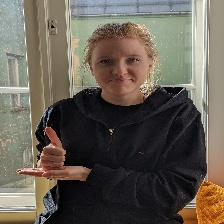

In [ ]:
img = cv2.imread('/content/data/train/help_66.jpg')
cv2_imshow(img)

In [ ]:
images = []
labels = []

class_mapping = {
    'food': 0,
    'hello': 1,
    'help': 2,
    'no': 3,
    'please': 4,
    'sorry': 5,
    'thankyou': 6,
    'wait': 7,
    'yes': 8
}

image_dir = '/content/data/train'

# Iterate through each image filename
for filename in os.listdir(image_dir):
    # Extract the hand sign name from the filename
    hand_sign_name = filename.split('_')[0]

    # Map the hand sign name to a numeric label
    label = class_mapping.get(hand_sign_name)

    if label is not None:
        # Load the image
        img = cv2.imread(os.path.join(image_dir, filename))
        # Resize the image to a fixed size if necessary
        # img = cv2.resize(img, (desired_width, desired_height))

        # Append the image and its corresponding label to the lists
        images.append(img)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the images and labels arrays
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)

Shape of images array: (720, 224, 224, 3)
Shape of labels array: (720,)


In [ ]:
type(images)

numpy.ndarray

array([[[123, 126, 124],
        [123, 126, 124],
        [124, 127, 125],
        ...,
        [174, 171, 167],
        [175, 172, 168],
        [176, 173, 169]],

       [[123, 126, 124],
        [123, 126, 124],
        [124, 127, 125],
        ...,
        [175, 172, 168],
        [175, 172, 168],
        [176, 173, 169]],

       [[124, 127, 125],
        [123, 126, 124],
        [124, 127, 125],
        ...,
        [175, 172, 168],
        [175, 172, 168],
        [176, 173, 169]],

       ...,

       [[ 63,  58,  55],
        [ 63,  59,  54],
        [ 64,  59,  56],
        ...,
        [117, 163, 180],
        [101, 147, 164],
        [ 90, 137, 151]],

       [[ 80,  67,  59],
        [ 82,  70,  60],
        [ 77,  64,  56],
        ...,
        [127, 170, 189],
        [106, 149, 168],
        [ 95, 139, 156]],

       [[ 81,  63,  52],
        [ 81,  63,  52],
        [ 82,  64,  53],
        ...,
        [146, 189, 208],
        [130, 172, 191],
        [126, 168, 187]]], dtype=uint8)
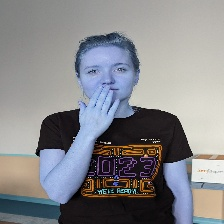

In [ ]:
images[6]

In [ ]:
X = np.array(images)
y = np.array(labels)

In [ ]:
print(X.shape)
print(y.shape)

(720, 224, 224, 3)
(720,)


In [ ]:
print(X[10])

[[[238 236 228]
  [214 211 203]
  [175 169 162]
  ...
  [117 107 100]
  [206 194 188]
  [215 203 197]]

 [[245 243 235]
  [ 94  92  84]
  [227 221 214]
  ...
  [182 172 165]
  [213 201 195]
  [199 187 181]]

 [[236 236 230]
  [170 167 162]
  [173 167 162]
  ...
  [166 158 151]
  [186 176 169]
  [217 207 200]]

 ...

 [[136 160 178]
  [147 171 189]
  [116 139 161]
  ...
  [ 89  98 111]
  [ 67  76  89]
  [ 53  62  75]]

 [[ 60  86 103]
  [ 44  70  87]
  [ 58  82 104]
  ...
  [ 80  91 105]
  [ 79  90 104]
  [ 80  91 105]]

 [[117 143 160]
  [ 81 107 124]
  [141 168 189]
  ...
  [ 66  77  91]
  [ 66  77  91]
  [ 70  81  95]]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# scaling the images
X_train = X_train/255
X_test = X_test/255

**Builing the CNN**

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(9, activation='softmax'))


In [ ]:
# compiling the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 50)

Epoch 1/50
17/17 [==============================] - 5s 100ms/step - loss: 3.2800 - accuracy: 0.1429 - val_loss: 2.3624 - val_accuracy: 0.0862
Epoch 2/50
17/17 [==============================] - 1s 76ms/step - loss: 2.9231 - accuracy: 0.1699 - val_loss: 3.5259 - val_accuracy: 0.1207
Epoch 3/50
17/17 [==============================] - 1s 79ms/step - loss: 2.9200 - accuracy: 0.1680 - val_loss: 2.5130 - val_accuracy: 0.1207
Epoch 4/50
17/17 [==============================] - 1s 81ms/step - loss: 2.7299 - accuracy: 0.1892 - val_loss: 2.3300 - val_accuracy: 0.1379
Epoch 5/50
17/17 [==============================] - 1s 76ms/step - loss: 2.6875 - accuracy: 0.1969 - val_loss: 2.3020 - val_accuracy: 0.0690
Epoch 6/50
17/17 [==============================] - 1s 75ms/step - loss: 2.4305 - accuracy: 0.2375 - val_loss: 2.3066 - val_accuracy: 0.0690
Epoch 7/50
17/17 [==============================] - 1s 76ms/step - loss: 2.4214 - accuracy: 0.2394 - val_loss: 2.2919 - val_accuracy: 0.0862
Epoch 8/50
1

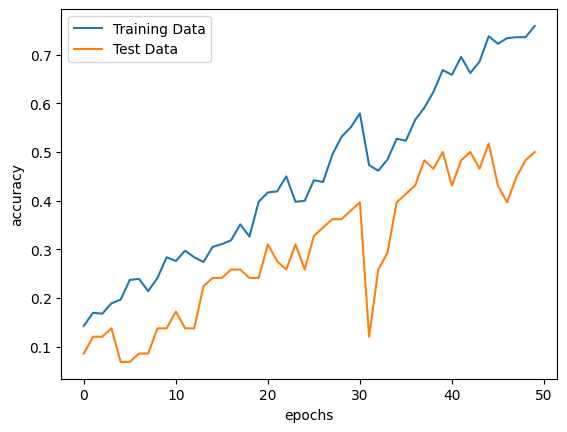

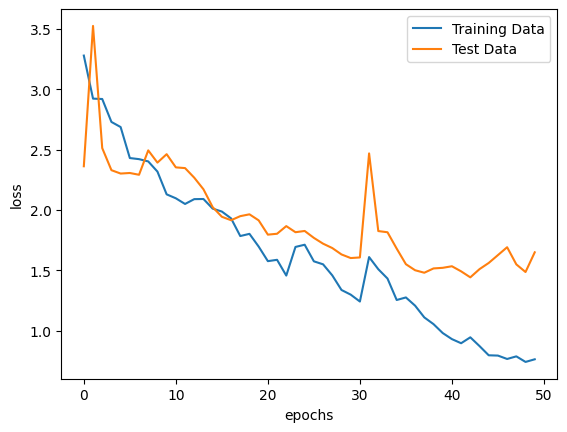

In [ ]:
# Visualizing the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Training Data', 'Test Data'], loc = 'best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training Data', 'Test Data'], loc = 'best')

plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

5/5 [==============================] - 0s 25ms/step - loss: 1.5550 - accuracy: 0.4444
1.5549556016921997
0.4444444477558136


Input image path: /content/data/val/56.jpg


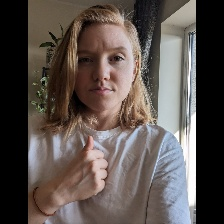

1/1 [==============================] - 0s 37ms/step
5
Sorry


In [ ]:
input_image_path = input('Input image path: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

img_resized = cv2.resize(input_image,(224,224))

img_scaled = img_resized/255

input_img_reshaped = np.reshape(img_scaled,[1,224,224,3])

input_prediction = model.predict(input_img_reshaped)

pred_label = np.argmax(input_prediction)

print(pred_label)

if pred_label == 0:
  print('Food')
elif pred_label == 1:
  print('Hello')
elif pred_label == 2:
  print('Help')
elif pred_label == 3:
  print('No')
elif pred_label == 4:
  print('Please')
elif pred_label == 5:
  print('Sorry')
elif pred_label == 6:
  print('Thank you')
elif pred_label == 7:
  print('Wait')
else:
  print('Yes')

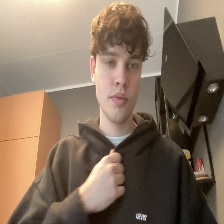

In [ ]:
img = cv2.imread('/content/data/train/sorry_32.jpg')
cv2_imshow(img)

In [ ]:
import pandas as pd

# Path to the directory containing the test images
test_image_dir = '/content/data/val'

# List to store the predictions
predictions = []

# Iterate through the test images
for filename in os.listdir(test_image_dir):
    # Extract the image ID from the filename (without the file extension)
    image_id = os.path.splitext(filename)[0]

    # Read the test image
    test_image = cv2.imread(os.path.join(test_image_dir, filename))

    # Preprocess the test image (resize, scale, reshape)
    test_image_resized = cv2.resize(test_image, (224, 224))
    test_image_scaled = test_image_resized / 255.0
    test_image_reshaped = np.reshape(test_image_scaled, (1, 224, 224, 3))

    # Make predictions using the trained model
    predicted_label_index = np.argmax(model.predict(test_image_reshaped))

    # Map the predicted label index to the corresponding hand sign
    # Assuming you have a list of hand sign labels
    hand_sign_labels = ['please', 'sorry', 'help', 'yes', 'food', 'hello','no','thankyou','wait']  # Add more labels as needed
    predicted_hand_sign = hand_sign_labels[predicted_label_index]

    # Append the prediction to the list
    predictions.append({'id': image_id, 'label': predicted_hand_sign, 'usage': 'test'})

# Create a DataFrame from the predictions
submission_df = pd.DataFrame(predictions)

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

1/1 [==============================] - 0s 20ms/step
